In [1]:
using Graphs, MetaGraphsNext
using Revise
includet("../visu.jl")
includet("io.jl")

In [2]:
function read_gml_file(file_path::String)
    open(file_path, "r") do file
        return read(file, String)
    end
end

function get_graph_from_gml(path)
    gml_content = read_gml_file(path)

    g = Graph()

    gml_splitted = split(gml_content, '\n')
    i_line = 1
    name = "unknown-network"

    while i_line < length(gml_splitted)
        line = strip(gml_splitted[i_line])

        if startswith(line, "Network ") 
            key, name = split(line, " ")
            name = strip(name, ['"'])
        end


        if startswith(line, "node") 
            add_vertex!(g)
        end

        if startswith(line, "edge")
            i_line += 1
            line = strip(gml_splitted[i_line])
            key, src = split(line, " ")
            i_line += 1
            line = strip(gml_splitted[i_line])
            key, dst = split(line, " ")
            add_edge!(g, parse(Int, src)+1, parse(Int, dst)+1)
        end

        i_line = i_line+1
    end

    return g, name
end

get_graph_from_gml (generic function with 1 method)

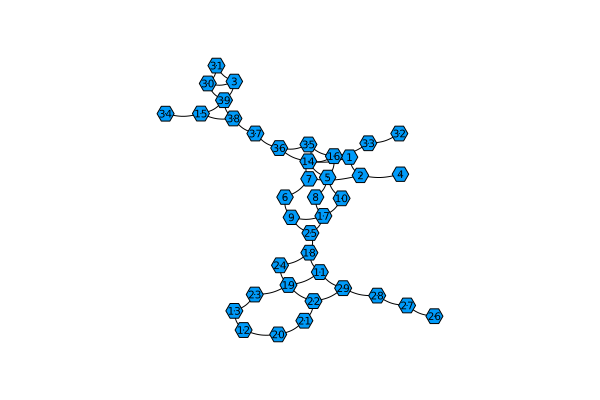

In [3]:
path = "../../../instances/topologyzoo/originals/Intranetwork.gml"

g, name = get_graph_from_gml(path)

visu_graph(g)

In [4]:
mg = MetaGraph(
    Graph(),
    Int,
    Dict,
    Dict,
    Dict(:name=>"zoo_v_" * name, :type=>"virtual")
)

for node in vertices(g)
    add_vertex!(mg, node, Dict(:dem=> 1))
end
for edge in edges(g)
    add_edge!(mg, src(edge), dst(edge), Dict(:dem=>1))
end


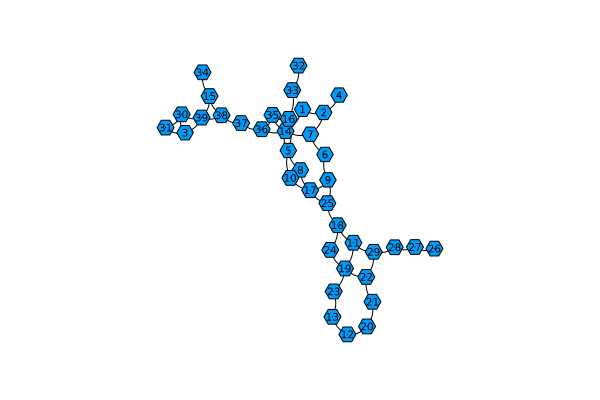

In [5]:
visu_graph(mg)

In [6]:
write_network_to_json(mg)

3177